In [34]:

# imports

import numpy as np
import pandas as pd
%matplotlib inline


In [35]:

# 导入数据

df = pd.read_excel(r"C:\Users\传防科电脑\Desktop\2025年7月.xlsx")

df.head()


,患者姓名,儿童家长姓名,性别,年龄,现住详细地址,乡镇/街道,人群分类,发病日期,发病年,发病月,疾病名称,报告卡录入时间
0,陈秀玲,NaN,女,47,板桥镇李河村赵砭组,板桥镇,农民,2024-02-02,2024,2,肺外结核,2025-01-16
1,张存良,NaN,男,62,大荆镇磨湾村一组,大荆镇,农民,2024-01-13,2024,1,丙肝,2025-01-15
2,林淑娥,NaN,女,58,陈塬街道邵涧村一组,陈塬街道,农民,2022-11-01,2022,11,乙肝,2025-01-14
3,李延军,NaN,男,62,麻街镇金林村一组,麻街镇,农民,2021-12-06,2021,12,乙肝,2025-01-14
4,雷生德,NaN,男,75,板桥镇连湾村六组,板桥镇,农民,2024-11-05,2024,11,丙肝,2025-01-13


In [36]:

# 预处理数据

flu_df = df[df['疾病名称'] == '流行性感冒']  # 筛选出流行性感冒的记录

flu_df['发病日期'] = pd.to_datetime(flu_df['发病日期'])  # 将发病日期列转换为 datetime 类型

flu_df.sort_values(by='发病日期', inplace=True) # 先按发病日期排序，索引要求是排序好的

flu_df.set_index('发病日期', inplace=True)  # 设置为索引，方便按时间聚合

flu_df = flu_df['2019':'2024']  # 过滤出2019至2024年数据

monthly_cases = flu_df.resample('ME').size()  # 按月统计病例数

monthly_cases

C:\Users\传防科电脑\AppData\Local\Temp\ipykernel_7048\304165999.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flu_df['发病日期'] = pd.to_datetime(flu_df['发病日期'])  # 将发病日期列转换为 datetime 类型
C:\Users\传防科电脑\AppData\Local\Temp\ipykernel_7048\304165999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flu_df.sort_values(by='发病日期', inplace=True) # 先按发病日期排序，索引要求是排序好的


发病日期
2019-01-31     113
2019-02-28      58
2019-03-31      86
2019-04-30      53
2019-05-31       5
              ... 
2024-08-31       7
2024-09-30       0
2024-10-31       7
2024-11-30      30
2024-12-31    1483
Freq: ME, Length: 72, dtype: int64

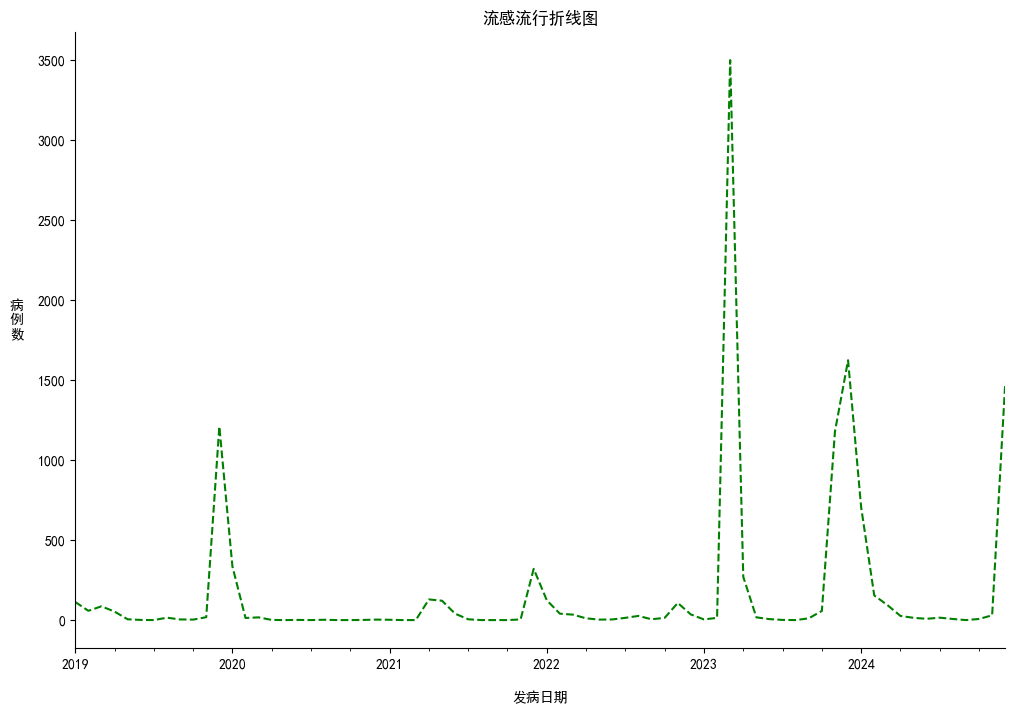

In [37]:

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 微软雅黑字体，支持中文
plt.rcParams['axes.unicode_minus'] = False             # 正常显示负号

ax = monthly_cases.plot(title="流感流行折线图", figsize=(12, 8), ls='--', c='g')
# ax.set(xlabel="发病日期", ylabel="病例数")

ax.set_xlabel("发病日期", rotation=0, labelpad=15)
ax.set_ylabel("病\n例\n数", rotation=0, labelpad=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

# 时间序列分解
进行时间序列建模首先要进行时间序列分解。世界序列分解成三部分：第一部分，长期趋势（Trend），用于看时间序列是否具有长期趋势；季节性（Seasonal），用于观察时间序列是否具有季节周期性；残差项（Resid），是不能被长期趋势和季节性解释的部分。

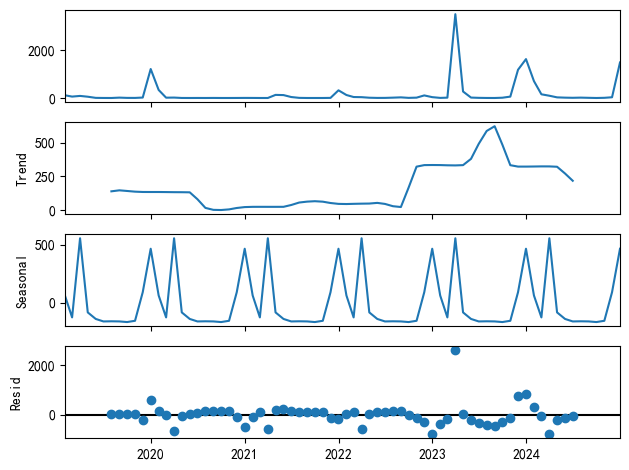

In [38]:

# 网报流感数据，进行时间序列分解

from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(df['Sales'], model='additive')
result = seasonal_decompose(monthly_cases, model='additive', period=12)

result.plot()


# 差分与平稳性检验
为什么要进行差分，因为平稳的数据才可以建模，差分可以让数据变平稳。根据时间序列分解，有长期趋势的需进行普通差分，后一天减前一天；有季节性的同时需进行季节性差分，如12个月为一个周期的，需相差12个月的两个值相减。差分后需进行平稳性检验，检验数据是否平稳。普通差分和平稳差分最大可进行两阶差分，太高阶的对原始数据损失太大，高阶就是对前一阶的结果再次进行差分。先进性普通差分，再进行季节性差分。
平稳性检验，p＜0.05，拒绝零假设，所以是不稳定；p>0.05才是平稳的。

In [39]:

# 平稳性检验

from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_cases.dropna())
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('critical values:', result[4])


ADF statistic: -6.613902926459391
p-value: 6.276934099799172e-09
critical values: {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}


In [40]:

# 普通差分

original_diff = monthly_cases.diff().dropna()


In [41]:

# 平稳性检验

from statsmodels.tsa.stattools import adfuller

result = adfuller(original_diff.dropna())
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('critical values:', result[4])


ADF statistic: -5.755985024104221
p-value: 5.818464542252447e-07
critical values: {'1%': -3.5386953618719676, '5%': -2.9086446751210775, '10%': -2.591896782564878}


In [42]:

# 季节性差分

seasonal_diff = original_diff.diff(12).dropna()


In [43]:

# 平稳性检验

from statsmodels.tsa.stattools import adfuller

result = adfuller(seasonal_diff.dropna())
print('ADF statistic:', result[0])
print('p-value:', result[1])
print('critical values:', result[4])


ADF statistic: -2.3961799228588347
p-value: 0.14281750140186866
critical values: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}


# 绘制自相关图和偏自相关图
绘制这两个图需用差分后的数据，平稳后的数据才可以建模。自相关图和偏自相关图是用来判断几阶的数据用来建模，所以需用差分后的数据。

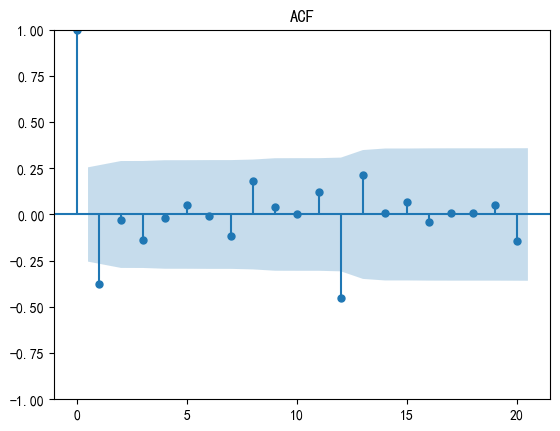

In [44]:

# 自相关图和偏自相关图

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(seasonal_diff, title="ACF", lags=20)


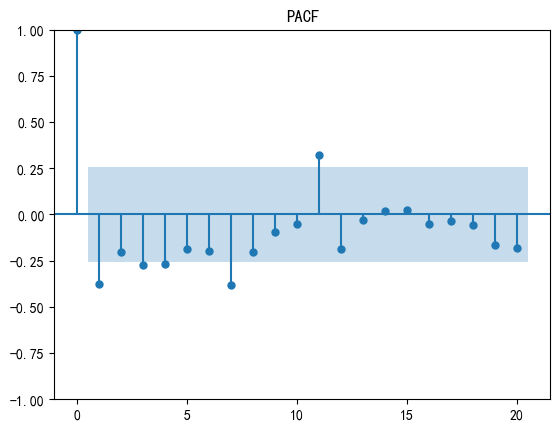

In [45]:

plot_pacf(seasonal_diff, title="PACF", lags=20)


# 利用AIC、BIC选择最优模型
只要你给模型SARIMAX传入了(p, d, q)(P, D, Q)，模型内部就会自动进行差分，所以这里给模型传入的是原始数据。
AIC和BIC计算的是预测值与时间值的差的和，越小越好，所以，通过这两个的最小值选出最优模型的(p, d, q)(P, D, Q)。

In [46]:

# 利用模型评估的AIC和BIC值对不同p、q进行挑选，选出合适的建模参数

import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

monthly_cases = np.log1p(monthly_cases)

p = d = q = range(0, 3)
P = D = Q = range(0, 2)
m = 12  

pdq = list(itertools.product(p, d, q))  # 生成所有参数组合
seasonal_pdq = list(itertools.product(P, D, Q))  # 生成所有参数组合

results = []

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(
                monthly_cases,
                order=param,
                seasonal_order=seasonal_param + (m,),
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            result = model.fit(disp=False)
            results.append({
                'order': param,
                'seasonal_order': seasonal_param,
                'aic': result.aic,
                'bic': result.bic
            })
        except:
            continue

results

D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[{'order': (0, 0, 0),
  'seasonal_order': (0, 0, 0),
  'aic': 379.5402767972839,
  'bic': 381.80295667432523},
 {'order': (0, 0, 0),
  'seasonal_order': (0, 0, 1),
  'aic': 298.0403468812454,
  'bic': 302.19542176905685},
 {'order': (0, 0, 0),
  'seasonal_order': (0, 1, 0),
  'aic': 287.4972569097881,
  'bic': 289.57479435369385},
 {'order': (0, 0, 0),
  'seasonal_order': (0, 1, 1),
  'aic': 207.85230671115917,
  'bic': 211.5526019145793},
 {'order': (0, 0, 0),
  'seasonal_order': (1, 0, 0),
  'aic': 285.0631787989898,
  'bic': 289.25186792343396},
 {'order': (0, 0, 0),
  'seasonal_order': (1, 0, 1),
  'aic': 265.3004389241572,
  'bic': 271.5330512558744},
 {'order': (0, 0, 0),
  'seasonal_order': (1, 1, 0),
  'aic': 218.9076451889705,
  'bic': 222.65004721078628},
 {'order': (0, 0, 0),
  'seasonal_order': (1, 1, 1),
  'aic': 213.36754013673115,
  'bic': 218.91798294186134},
 {'order': (0, 0, 1),
  'seasonal_order': (0, 0, 0),
  'aic': 318.8110239250188,
  'bic': 323.3080144091175},
 {

In [47]:

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='bic')

print("✅ 最佳模型（按 BIC 最小）:")
print(results_df.iloc[0])

best_order = results_df.iloc[0]['order']
best_seasonal_order = results_df.iloc[0]['seasonal_order']


✅ 最佳模型（按 BIC 最小）:
order              (0, 1, 2)
seasonal_order     (0, 1, 1)
aic               174.357064
bic               181.493822
Name: 43, dtype: object


In [48]:

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='aic')

print("✅ 最佳模型（按 AIC 最小）:")
print(results_df.iloc[0])

best_order = results_df.iloc[0]['order']
best_seasonal_order = results_df.iloc[0]['seasonal_order']


✅ 最佳模型（按 AIC 最小）:
order              (2, 1, 2)
seasonal_order     (1, 1, 1)
aic               172.329313
bic                184.81864
Name: 191, dtype: object


# 模型评价
模型的输出结果可以看出模型的好坏，最后还要对模型进行白噪声的检验，看残差项是否不具有趋势。

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# 若 monthly_cases 已按日期索引、无缺失值
model = SARIMAX(monthly_cases,
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
print(results.summary())


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                   72
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 -79.165
Date:                              Mon, 21 Jul 2025   AIC                            172.329
Time:                                      16:10:31   BIC                            184.819
Sample:                                  01-31-2019   HQIC                           176.961
                                       - 12-31-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8540      0.154      5.559      0.000       0.553       1.155
ar.L2         -0.43

In [50]:

# 预测结果

forecast_log = results.predict(72, 83).rename('SARIMAX Forecast (log1p, 12 months)')

forecast_original = np.expm1(forecast_log).rename('SARIMAX(2,1,2)(1,1,1,12) Forecast (original, 12 months)')   # 逆变换预测结果

forecast_original.round(0)


2025-01-31     514.0
2025-02-28     134.0
2025-03-31     462.0
2025-04-30     236.0
2025-05-31      66.0
2025-06-30      51.0
2025-07-31      28.0
2025-08-31      24.0
2025-09-30      26.0
2025-10-31      54.0
2025-11-30     394.0
2025-12-31    1208.0
Freq: ME, Name: SARIMAX(2,1,2)(1,1,1,12) Forecast (original, 12 months), dtype: float64

In [51]:

monthly_cases = np.expm1(monthly_cases).rename('True value: monthly_cases')

monthly_cases


发病日期
2019-01-31     113.0
2019-02-28      58.0
2019-03-31      86.0
2019-04-30      53.0
2019-05-31       5.0
               ...  
2024-08-31       7.0
2024-09-30       0.0
2024-10-31       7.0
2024-11-30      30.0
2024-12-31    1483.0
Freq: ME, Name: True value: monthly_cases, Length: 72, dtype: float64

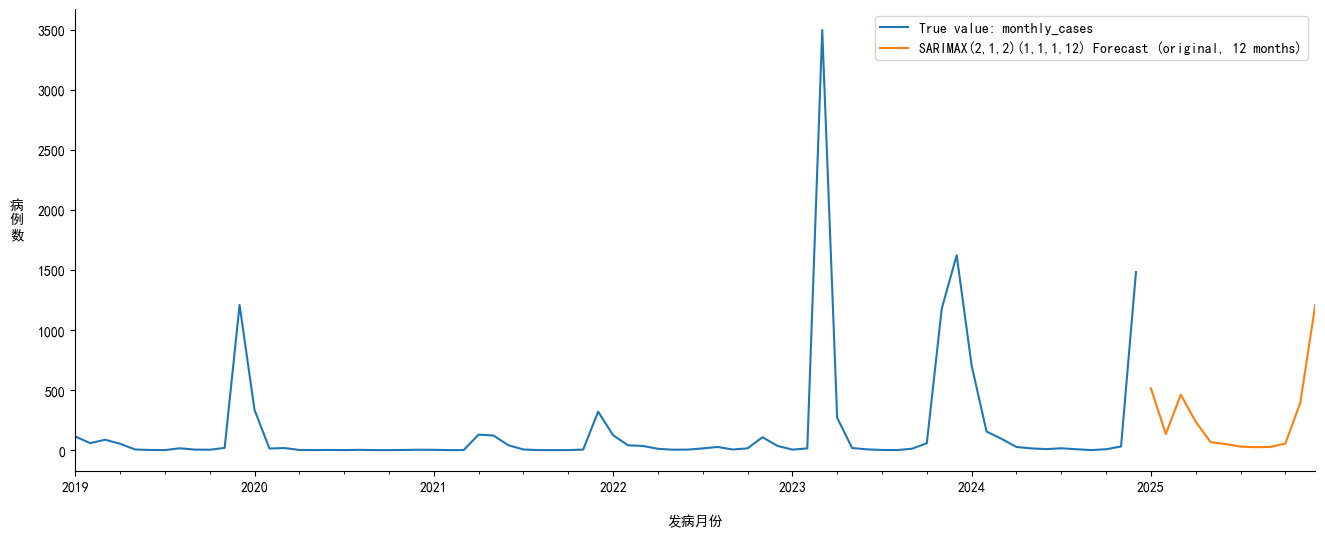

In [54]:

# 预测曲线

ax = monthly_cases.plot(legend=True,figsize=(16,6),title="")
forecast_original.plot(ax=ax, legend=True)  # legend显示图例

ax.autoscale(axis='x',tight=True)  # 自动调整x轴范围

ax.set_xlabel("发病月份", rotation=0, labelpad=15)
ax.set_ylabel("病\n例\n数", rotation=0, labelpad=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("my_figure.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


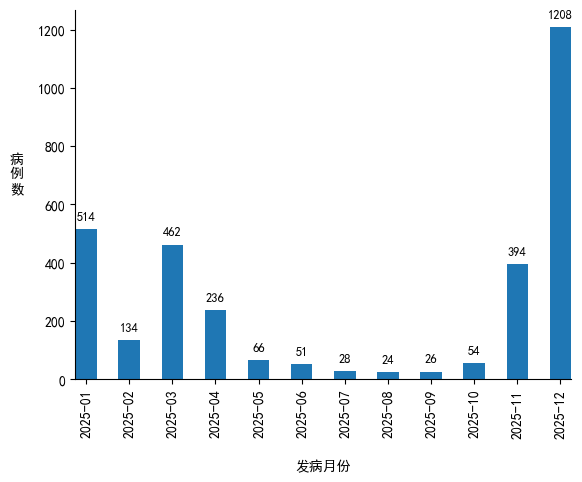

In [55]:
ax = forecast_original.plot(kind='bar', legend=False,  width=0.5)  # legend显示图例

ax.autoscale(axis='x', tight=True)  # 自动调整x轴范围

ax.set_xlabel("发病月份", rotation=0, labelpad=15)
ax.set_ylabel("病\n例\n数", rotation=0, labelpad=15)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=9, padding=5)

new_labels = forecast_original.index.strftime('%Y-%m') 
ax.set_xticklabels(new_labels)  # 重设x轴刻度标签

plt.show()
